# CHP marker

In [ ]:
import pandas as pd
import numpy as np
import pickle
from SEQLinkage.linkage import *

### Read fam

In [ ]:
fam17 = pd.read_csv('../data/new_trim_ped_famless17_no:xx.fam',delim_whitespace=True,header=None,names=['fid','iid','fathid','mothid','sex','ad'])
fam17.index = list(fam17.iid)
fam17.ad[fam17.ad==-9]=0
fam17_d = {}
for i in fam17.fid.unique():
    fam17_d[i] = fam17[fam17.fid==i]

/tmp/2296001.1.high_mem.q/ipykernel_13925/2396333578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam17.ad[fam17.ad==-9]=0


In [ ]:
with open('../data/wg20220316/chr22test/tmp/CACHE/chr22test0.pickle', 'rb') as handle:
    genes = pickle.load(handle)

In [ ]:
genes.keys()

dict_keys(['DUXAP8', 'BMS1P22@3', 'BMS1P17@3,BMS1P18@3', 'PSLNR', 'POTEH', 'POTEH-AS1@2', 'OR11H1', 'CCT8L2', 'TPTEP1', 'ANKRD62P1-PARP4P3', 'LINC01665', 'XKR3', 'HSFY1P1', 'GAB4', 'CECR7', 'IL17RA', 'TMEM121B', 'LINC01664', 'HDHD5', 'HDHD5-AS1', 'ADA2', 'CECR3', 'CECR2', 'LOC101929372', 'ATP6V1E1'])

In [ ]:
from cstatgen import cstatgen_py3 as cstatgen

In [ ]:
wsize=1
coder = cstatgen.HaplotypeCoder(wsize)

In [ ]:
coder.Execute([chp_haps[2][:,[0,1]+list(np.where(chp_haps[1]<0.05)[0]+2)]], [chp_haps[1][chp_haps[1]<0.05]], [[[]]],False)

NameError: name 'chp_haps' is not defined

In [ ]:
for line in coder.GetHaplotypes():
    print(line[2],line[4])

5 10
6 3
0 0
4 12
2 1
7 9
8 11
6 5
6 5
0 6


In [ ]:
coder.GetHaplotypes()

(('989',
  '989_1',
  '5',
  '2112211111111111111111112111111111111111111212212222111221112122',
  '10',
  '1121122121111112222112221212212222111222121111121111111111111111'),
 ('989',
  '989_2',
  '6',
  '1111111111111222212211111121121111222111112121111111222212211111',
  '3',
  '1211111212222111111121111112211111111111211111111111111111121211'),
 ('989', '989_29', '0', 'NULL', '0', 'NULL'),
 ('989',
  '989_99',
  '4',
  '1111111111111221111121111122121111211111112121111111221111121211',
  '12',
  '2121122121111112222112222111112222111222121112212222111211111122'),
 ('989',
  '989_24',
  '2',
  '1111111111111111111111111111111111111111211111111111111111111111',
  '1',
  '1111111111111111111111111111111111111111111111111111111111111111'),
 ('989',
  '989_10',
  '7',
  '1211111111122112212121111121221111111111112121111111222212211211',
  '9',
  '1112211111111111111112222211211222111221111212121222111111111122'),
 ('989',
  '989_8',
  '8',
  '11111112122112222122211111211211112221111121

In [ ]:
coder.Execute([chp_haps[2][:,[0,1]+list(np.where(chp_haps[1]<0.05)[0]+2)]], [chp_haps[1][chp_haps[1]<0.05]], [[[]]],True)

In [ ]:
coder.GetHaplotypes()

(('989',
  '989_1',
  '2,3,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,2,1,2,2,1,4,1,2,2,1,4',
  '21,122,11,111,111,11,1111,1,1,11,1,2,11,1,11,1111,1,1111,111,1,2,1,2,2,1,222211,1,2,211,1,2122',
  '1,2,2,2,1,1,3,1,1,2,2,1,2,2,2,3,1,2,3,1,1,1,1,1,2,1,1,1,1,1,1',
  '11,211,22,121,111,11,2222,1,1,22,2,1,21,2,21,2222,1,1122,212,1,1,1,1,1,2,111111,1,1,111,1,1111'),
 ('989',
  '989_2',
  '1,1,1,1,1,2,2,2,1,1,1,1,3,1,3,1,2,3,1,2,1,2,1,1,1,2,2,2,3,1,1',
  '11,111,11,111,111,22,2212,2,1,11,1,1,12,1,12,1111,2,2211,111,2,1,2,1,1,1,111122,2,2,122,1,1111',
  '3,1,1,3,4,1,1,1,2,1,1,1,1,2,2,1,1,1,2,1,1,1,1,1,1,1,1,1,1,2,2',
  '12,111,11,212,222,11,1111,1,2,11,1,1,11,2,21,1111,1,1111,121,1,1,1,1,1,1,111111,1,1,111,2,1211'),
 ('989',
  '989_29',
  '0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0',
  'NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL',
  '0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
def count_recomb(chp_haps):
    coder.Execute([chp_haps[2][:,[0,1]+list(np.where(chp_haps[1]<0.05)[0]+2)]], [chp_haps[1][chp_haps[1]<0.05]], [[[]]],True)
    return len(coder.GetHaplotypes()[0][2].split(','))

In [ ]:
def count_recomb1(chp_haps,cutoff=3):
    coder.Execute([chp_haps[2][:,[0,1]+list(np.where(chp_haps[1]<0.05)[0]+2)]], [chp_haps[1][chp_haps[1]<0.05]], [[[]]],True)
    if len(coder.GetHaplotypes()[0][2].split(','))<=3:
        print(coder.GetHaplotypes()[0])

In [ ]:
tmp = []
for i in genes['TPTEP1']['predata'].values():
    tmp.append(count_recomb(i))

In [ ]:
sum(pd.Series(tmp)<3)/len(tmp)

0.4551148225469729

<AxesSubplot:>

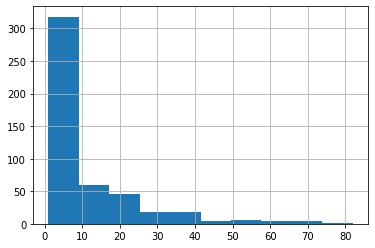

In [ ]:
pd.Series(tmp).hist()

In [ ]:
for i in genes['TPTEP1']['predata'].values():
    count_recomb1(i)

('1033', '1033_1', '3', '22222222221', '2', '11111111112')
('1036', '1036_1', '4', '122121221111', '0', 'NULL')
('10J_103', '10J_103_3', '2', '222222121222212222212222222222222', '0', 'NULL')
('10J_119', '10J_119_2', '3', '222111212211', '0', 'NULL')
('10J_121', '10J_121_2', '3', '22211222222', '2', '11122111111')
('10J_131', '10J_131_3', '2', '11112', '3', '22221')
('10J_89', '10J_89_2', '3', '11222', '0', 'NULL')
('10R_R105', '10R_R105_6', '1,4', '1,1122', '1,1', '1,1111')
('10R_R16', '10R_R16_15', '2', '11122111', '3', '11111212')
('10R_R4', '10R_R4_10', '2', '222111222111', '3', '111222111222')
('10R_R66', '10R_R66_3', '2', '1111111111121', '5', '1222211211111')
('10R_R87', '10R_R87_3', '3', '2211212', '2', '1122121')
('1137', '1137_1', '2', '111111111111111111121211112', '6', '121212221122112221111111111')
('11_15', '11_15_15.101', '3', '2212211', '1', '1111111')
('11_19', '11_19_19.101', '1', '11111111', '0', 'NULL')
('1252', '1252_1', '3', '1111111221', '4', '1122112111')
('1277

In [ ]:
def get_chp_haps(haps,cutoff=0.05):
    new_haps = pd.DataFrame(haps[2][:,2:])
    new_haps.index = haps[2][:,1]
    new_haps.columns = haps[0]
    new_haps=new_haps.loc[:,haps[1]<cutoff]
    return new_haps

In [ ]:
chp_haps=genes['TPTEP1']['predata']['989']

In [ ]:
list([chp_haps[2][:,[0,1]+list(np.where(chp_haps[1]<0.05)[0]+2)]])

[array([['989', '989_1', '2:', ..., '1:', '2:', 'A2,1:'],
        ['989', '989_1', '1:', ..., '1:', '1:', '1:'],
        ['989', '989_2', '1:', ..., '1:', '1:', '1:'],
        ...,
        ['989', '989_6', '2|', ..., '1|', '2|', 'A2,1|'],
        ['989', '989_30', '?|', ..., '?|', '?|', '?|'],
        ['989', '989_30', '1|', ..., '1|', '1|', '1|']], dtype='<U6')]

In [ ]:
haplotypes
chp_haps.iloc[0,:]

chr22:16603423:G:A         2:
chr22:16603689:C:CT        1:
chr22:16607513:CT:C        1:
chr22:16608484:T:A         2:
chr22:16608728:A:T         2:
                        ...  
chr22:16644805:G:A         1:
chr22:16644880:G:A         2:
chr22:16644924:G:T         1:
chr22:16645776:CAT:C       2:
chr22:16648380:C:T      A2,1:
Name: 989_1, Length: 64, dtype: object

### Filter geno

In [ ]:
with open('../data/wg20220316/chr22test/TPTEP1genodata.pickle', 'rb') as handle:
    geno = pickle.load(handle)

#### Famliy 989

In [ ]:
chp_haps=genes['TPTEP1']['predata']['989']

In [ ]:
pd.DataFrame(geno['989'])

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,161
0,989,989_1,0,0,1,00,00,00,00,00,...,00,00,00,00,00,00,00,00,00,00
1,989,989_2,0,0,2,00,00,00,00,00,...,00,00,00,00,00,00,00,00,00,00
2,989,989_10,989_1,989_2,1,12,12,11,12,12,...,11,12,12,12,12,11,11,11,12,12
3,989,989_8,989_1,989_2,1,12,12,12,11,12,...,11,12,12,12,12,11,11,11,12,12
4,989,989_99,989_1,989_2,2,12,12,12,11,12,...,11,12,22,12,22,12,11,11,12,12
5,989,989_24,989_1,989_2,2,11,11,11,11,11,...,22,22,22,11,22,11,22,12,11,22
6,989,989_6,989_1,989_2,1,00,00,00,00,00,...,00,00,00,00,00,00,00,00,00,00
7,989,989_7,989_1,989_2,1,00,00,00,00,00,...,00,00,00,00,00,00,00,00,00,00
8,989,989_29,0,0,2,00,00,00,00,00,...,00,00,00,00,00,00,00,00,00,00
9,989,989_30,989_6,989_29,2,00,00,00,00,00,...,00,00,00,00,00,00,00,00,00,00


In [ ]:
haplotyper = cstatgen.HaplotypingEngine(verbose = False)

In [ ]:
item_varnames=chp_haps[0]
positions = [int(i.split(':')[1]) for i in item_varnames]
chrom = '22'

In [ ]:
fgeno = np.array(geno['989'])

In [ ]:
item_haplotypes = haplotyper.Execute(chrom, item_varnames, positions, fgeno)

In [ ]:
item_haplotypes = haplotyper.Execute(chrom, item_varnames[:80], positions[:80], fgeno[:85])

In [ ]:
np.alltrue(np.array(item_haplotypes[0]) == chp_haps[2][:,:82])

True

In [ ]:
def hapexe(idx):
    new_pos = [j for i,j in zip(idx,positions) if i]
    item_haplotypes = haplotyper.Execute(chrom, item_varnames[idx],new_pos, fgeno[:,[0,1,2,3,4]+list(np.where(idx)[0]+5)])
    return item_haplotypes

#### 1.remove common variants

In [ ]:
item_haplotypes_rare = hapexe(chp_haps[1]<0.05)

In [ ]:
idx = chp_haps[1]<0.05

In [ ]:
np.array(item_haplotypes_rare[0]) == chp_haps[2][:,[0,1]+list(np.where(idx)[0]+2)]

array([[ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True, False, ...,  True,  True, False],
       [ True,  True, False, ...,  True,  True,  True],
       [ True,  True, False, ..., False, False, False]])

In [ ]:
[:,[0,1,2,3,4]+list(np.where(chp_haps[1]<0.05)[0]+5)]

In [ ]:
coder.Execute([chp_haps[2][:,[0,1]+list(np.where(chp_haps[1]<0.05)[0]+2)]], [chp_haps[1][chp_haps[1]<0.05]], [[[]]],True)

In [ ]:
len(coder.GetHaplotypes()[0][2].split(','))

31

In [ ]:
coder.Execute([np.array(item_haplotypes_rare[0])], [chp_haps[1][chp_haps[1]<0.05]], [[[]]],True)

In [ ]:
len(coder.GetHaplotypes()[0][2].split(','))

19

In [ ]:
coder.GetHaplotypes()

(('989',
  '989_1',
  '2,2,3,1,1,1,1,1,1,2,2,3,2,3,1,2,2,1,2',
  '212112,2,2122,111111,1,1,1,11111111,1,2,2,2222,22,222,1,221222122222212,211,1,2122',
  '1,1,1,2,1,2,1,2,2,1,1,1,1,1,2,1,1,1,1',
  '111111,1,1111,221122,1,2,1,22222221,2,1,1,1111,11,111,2,111111111111111,111,1,1111'),
 ('989',
  '989_2',
  '1,1,2,3,2,2,2,3,1,1,1,1,1,1,1,1,1,2,3',
  '111111,1,1211,112222,2,2,2,22222122,1,1,1,1111,11,111,1,111111111111111,111,2,1222',
  '3,1,1,1,1,1,1,1,2,2,1,2,1,2,1,3,3,1,1',
  '121221,1,1111,111111,1,1,1,11111111,2,2,1,2221,11,221,1,122221212222222,122,1,1111'),
 ('989',
  '989_29',
  '0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0',
  'NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL',
  '0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0',
  'NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL'),
 ('989',
  '989_99',
  '1,1,2,3,2,2,1,3,1,1,1,1,1,1,1,1,1,2,3',
  '111111,1,1211,112222,2,2,1,22222122,1,1,1,1111,11,111,1,111

In [ ]:
tmp = pd.DataFrame(fgeno)

In [ ]:
tmp1=pd.DataFrame([tmp.loc[:,i].value_counts() for i in range(5,162)])

In [ ]:
tmp1=tmp1.fillna(0)

In [ ]:
tmp1.iloc[:,[1,3]].sum(axis=1).value_counts()

1.0    70
3.0    38
4.0    29
2.0    20
dtype: int64

In [ ]:
tmp1.iloc[:,[0,1]].sum(axis=1).value_counts()

7.0    46
9.0    44
8.0    39
6.0    28
dtype: int64

In [ ]:
item_haplotypes_rare1 = hapexe(np.logical_and(np.array(tmp1.iloc[:,[1,3]].sum(axis=1)==1),idx))

In [ ]:
coder.Execute([np.array(item_haplotypes_rare1[0])], [chp_haps[1][np.logical_and(np.array(tmp1.iloc[:,[1,3]].sum(axis=1)==1),idx)]], [[[]]],True)

In [ ]:
len(coder.GetHaplotypes()[0][2].split(','))

9

In [ ]:
coder.GetHaplotypes()

(('989',
  '989_1',
  '1,2,3,1,1,2,2,3,1',
  '11111111,21,22,1,11,12,2,2122,11',
  '3,1,1,1,1,1,1,1,2',
  '22211122,11,11,1,11,11,1,1111,21'),
 ('989',
  '989_2',
  '1,1,1,1,2,3,0,2,3',
  '11111111,11,11,1,22,21,NULL,1211,12',
  '2,3,2,2,1,1,1,1,1',
  '11122211,12,12,2,11,11,1,1111,11'),
 ('989',
  '989_29',
  '0,0,0,0,0,0,0,0,0',
  'NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL',
  '0,0,0,0,0,0,0,0,0',
  'NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL'),
 ('989',
  '989_99',
  '1,1,1,2,1,1,1,1,1',
  '11111111,11,11,2,11,11,1,1111,11',
  '1,2,1,1,1,1,1,1,2',
  '11111111,21,11,1,11,11,1,1111,21'),
 ('989',
  '989_24',
  '1,1,1,1,1,3,1,1,1',
  '11111111,11,11,1,11,21,1,1111,11',
  '1,1,1,1,1,1,1,1,1',
  '11111111,11,11,1,11,11,1,1111,11'),
 ('989',
  '989_10',
  '1,1,2,1,1,1,1,1,1',
  '11111111,11,12,1,11,11,1,1111,11',
  '3,1,3,1,1,2,2,3,1',
  '22211122,11,22,1,11,12,2,2122,11'),
 ('989',
  '989_8',
  '2,3,1,1,2,1,1,2,3',
  '11122211,12,11,1,22,11,1,1211,12',
  '1,1,1,1,1,1,1,1,1',
  '1111

In [ ]:
item_haplotypes_rare2 = hapexe(np.array(tmp1.iloc[:,[1,3]].sum(axis=1)==1))

In [ ]:
coder.Execute([np.array(item_haplotypes_rare2[0])], [chp_haps[1][np.array(tmp1.iloc[:,[1,3]].sum(axis=1)==1)]], [[[]]],True)

In [ ]:
len(coder.GetHaplotypes()[0][2].split(','))

38

In [ ]:
coder.GetHaplotypes()

(('989',
  '989_1',
  '1,1,1,3,2,2,3,2,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,2,1,1,1,1,1,1,1',
  '1,11,11,2221,22,22,212,2,1,111,1,2,1,2,11,1,111,1,1,1,1,1,111,1,11,11111,1,2,22222,1,2,1111,1,111,11,1,1,11',
  '1,2,2,1,1,1,1,1,2,1,2,1,2,1,2,2,1,1,2,2,2,1,2,1,1,3,2,1,1,2,1,2,1,2,2,2,1,3',
  '1,22,22,1111,11,11,111,1,2,111,2,1,2,1,22,2,111,1,2,2,2,1,222,1,11,22222,2,1,11111,2,1,2222,1,211,12,2,1,22'),
 ('989',
  '989_2',
  '1,1,1,1,1,1,2,1,2,1,2,1,2,1,2,1,1,2,2,1,2,2,1,2,2,1,1,1,1,1,1,1,2,3,1,2,1,1',
  '1,11,11,1111,11,11,121,1,2,111,2,1,2,1,22,1,111,2,2,1,2,2,111,2,22,11111,1,1,11111,1,1,1111,2,122,11,2,1,11',
  '2,2,1,2,1,2,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,1,2,1,1,2,1,1,2,1,1,2,1,1,3,1,2,2',
  '2,22,11,1112,11,22,111,1,1,222,1,1,1,1,11,1,222,1,1,1,1,1,222,1,11,22211,1,1,22222,1,1,2222,1,111,21,1,2,21'),
 ('989',
  '989_29',
  '0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0',
  'NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NU